In [1]:
### Load model mechanisms

In [1]:
modelPath = 'Models/MiglioreShepherd2008/MT-GC'
modelName = 'MiglioreShepherd2008'

def getSomaScript(h):
    
    h.load_file('mosinit.hoc')
    h("objref p")
    h("p = new PythonObject()")
    
    h.p.soma = h.mt[0].soma
    
    return h.p.soma

### Create a NeuronUnit model

In [2]:
%matplotlib inline
import helpers

mod1 = helpers.createModel(name = modelName, \
                           path = modelPath, \
               getSectionScript = getSomaScript)

mod1.setIntegrationMethod("variable")

# Interactively find stimulation currents
#helpers.IClampWidget(mod1)

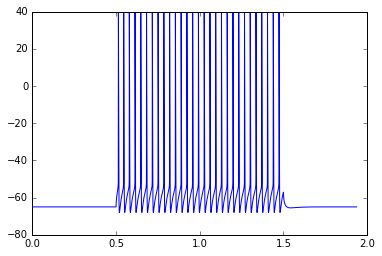

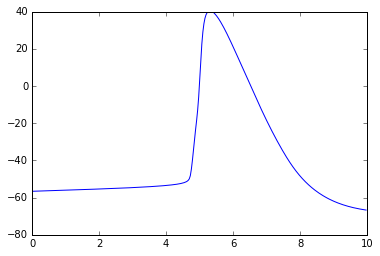

In [3]:
helpers.IClampWidget(mod1)

In [4]:
from quantities import nA, s, ms

# Set currents
i_rest =    {'amplitude':     0*nA, 'delay': 0.5*s, 'duration': 1*s}
i_passive = {'amplitude':  -0.2*nA, 'delay': 0.5*s, 'duration': 1*s}
i_ap  =     {'amplitude':     3*nA, 'delay': 0.5*s, 'duration': 0.5*ms}
i_thresh =  {'amplitude':  .108*nA, 'delay': 0.5*s, 'duration': 1000*ms}

### Define tests to run

----------
Running Test: Resting potential test
Expected: -57.4345864662 mV +/- 24.630188347 mV SD
Actual: -65.0000000007 mV, Z: -0.307160198206 SDs


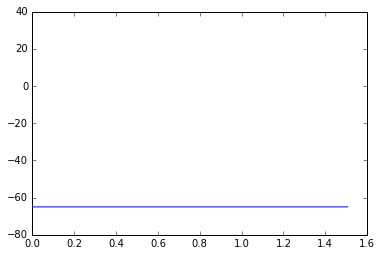

----------
Running Test: Resting potential test
Expected: -57.4345864662 mV +/- 24.630188347 mV SD
Actual: -65.0000000007 mV, Z: -0.307160198206 SDs


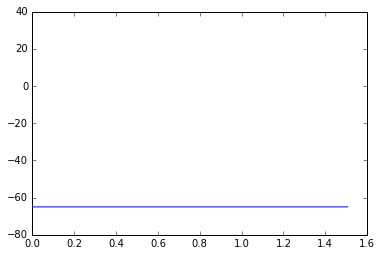

----------
Running Test: Input resistance test
Expected: 145113133.641 ohm +/- 189410293.868 ohm SD
Actual: 67252621.9928 kg*m**2/(s**3*A**2), Z: -0.411068005111 SDs


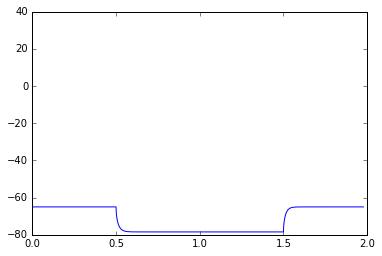

----------
Running Test: Time constant test
Expected: 27.9651006711 ms +/- 66.3591805191 ms SD
Actual: 18.939961688 ms, Z: -0.136004376675 SDs


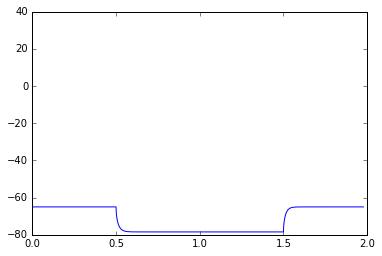

----------
Running Test: Injected current AP width test
Expected: 1.513125 ms +/- 0.961592715477 ms SD
Actual: 1.875 ms, Z: 0.376328765989 SDs


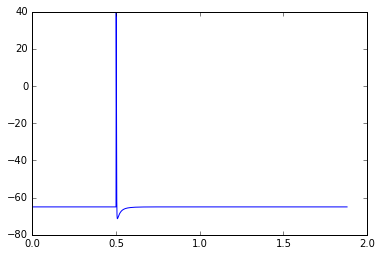

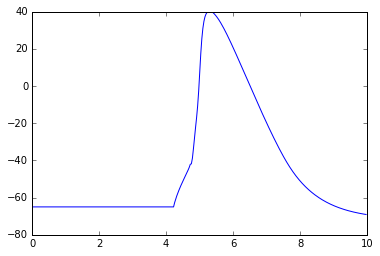

----------
Running Test: Injected current AP threshold test
Expected: -34.6053571429 mV +/- 56.7790487536 mV SD
Actual: -48.9930086054 mV, Z: -0.253397191012 SDs


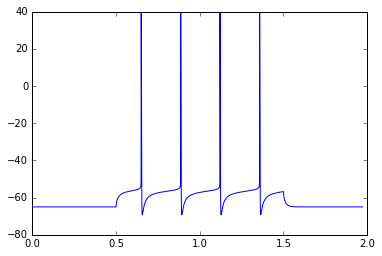

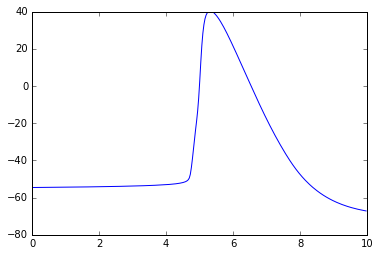

----------
Running Test: Injected current AP amplitude test
Expected: 68.776 mV +/- 50.4271404587 mV SD
Actual: 89.2747849297 mV, Z: 0.406503020857 SDs


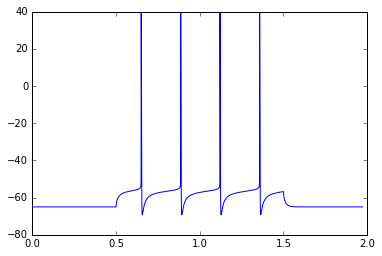

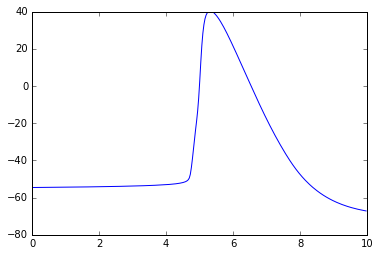

In [5]:
# Initialize the tests and get their expected values
tests = helpers.setupTests(i_rest, i_passive, i_ap, i_thresh, expectedSource = "Pooled")

helpers.runOneTest(tests[0], mod1)

results = helpers.runAllTests(tests,mod1)

In [ ]:
pp(results)
helpers.saveResults(results)
pp(helpers.loadResults())
mod1.h.quit()

{'MiglioreShepherd2008': {'Injected current AP amplitude test': array(89.27478492966837) * mV,
                          'Injected current AP threshold test': array(-48.993008605350624) * mV,
                          'Injected current AP width test': array(1.875) * ms,
                          'Input resistance test': array(67252621.99283747) * kg*m**2/(s**3*A**2),
                          'Resting potential test': array(-65.00000000068397) * mV,
                          'Time constant test': array(18.939961688009674) * ms}}
{'BhallaBower1993': {'Injected current AP amplitude test': array(71.32715773727804) * mV,
                     'Injected current AP threshold test': array(-40.35042798167796) * mV,
                     'Injected current AP width test': array(0.5333333333333333) * ms,
                     'Input resistance test': array(51778384.93506186) * kg*m**2/(s**3*A**2),
                     'Resting potential test': array(-65.83856328513072) * mV,
                     'Ti